In [79]:
# import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [80]:
data = pd.read_csv("/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [81]:
# 1. 결측치, 이상치 검토
# 2. 유의미한 시각화 5개 이상
# 3. 수치형 변수 간 상관관계 파악
# 4. 파생변수 생성

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

타켓 변수의 비율 확인

In [83]:
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


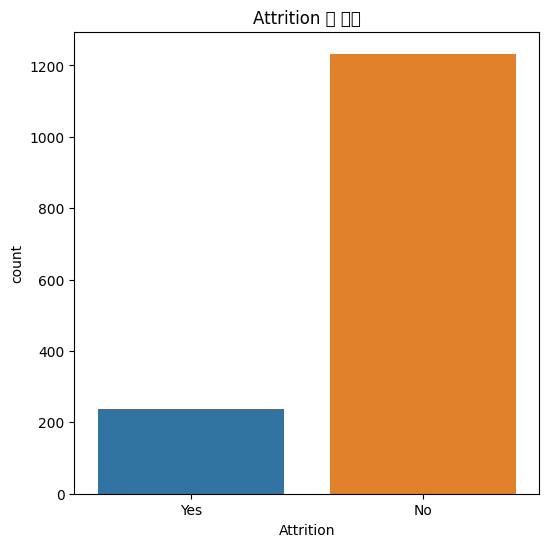

In [85]:
plt.figure(figsize = (6,6))
sns.countplot(x= data['Attrition'])
plt.title('Attrition 의 분포')
plt.show()

In [86]:
print(f'{data.Attrition.value_counts().index[0]} : {round(data.Attrition.value_counts()[0] / len(data), 2) * 100}%')
print(f'{data.Attrition.value_counts().index[1]} : {round(data.Attrition.value_counts()[1] / len(data), 2) * 100}%')

No : 84.0%
Yes : 16.0%


## 1. 결측치, 이상치 검토

In [87]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

결측치는 존재하지 않는다.

이상치를 확인하기 위해서 먼저 수치형 데이터와 카테고리형 데이터를 나눈다.




In [90]:
numerical_columns = data.select_dtypes(include=["int64"]).columns
categorical_columns = data.select_dtypes(include=["object"]).columns

print(numerical_columns)
print(f'{len(numerical_columns)}개')
print(categorical_columns)
print(f'{len(categorical_columns)}개')



Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
26개
Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
9개


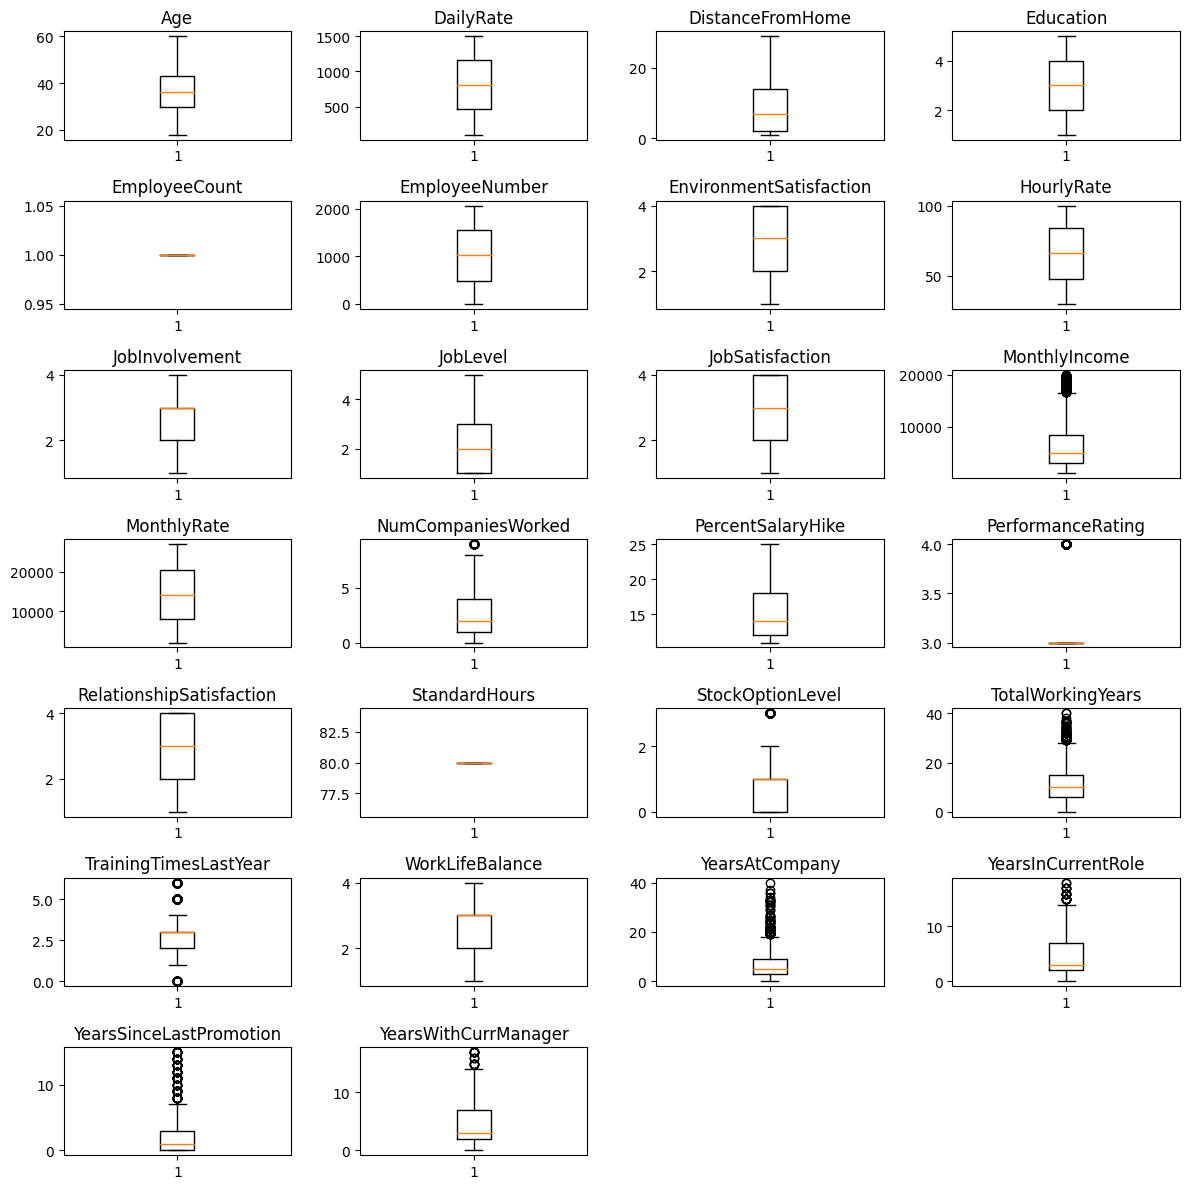

In [91]:
# 수치형 변수만 boxplot그리기

plt.figure(figsize=(12,12))

for i, column in enumerate(numerical_columns):
  plt.subplot(7,4,i+1)
  plt.boxplot(data[column])
  plt.title(column)

plt.tight_layout()
plt.show()


In [92]:
# 이상치 제거 함수 만들기

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]



In [94]:
for column in numerical_columns:
  cleaned_data = remove_outliers_iqr(data,column)




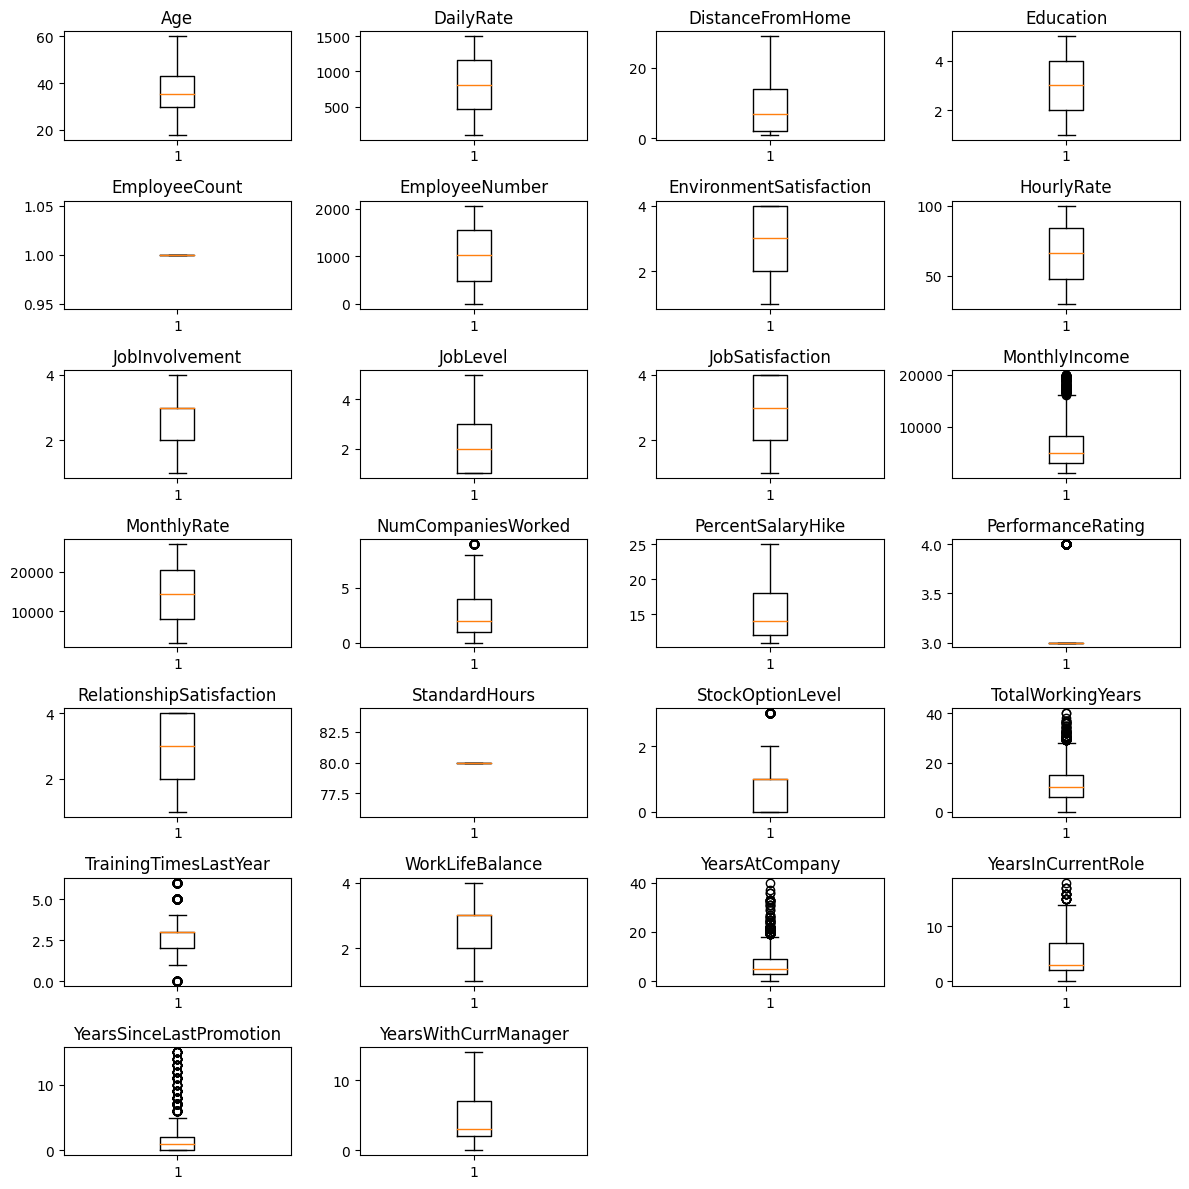

In [95]:
# 다시 boxplot 그려보기

plt.figure(figsize=(12,12))

for i, column in enumerate(numerical_columns):
  plt.subplot(7,4,i+1)
  plt.boxplot(cleaned_data[column])
  plt.title(column)

plt.tight_layout()
plt.show()

## 2. 유의미한 시각화 5개 이상

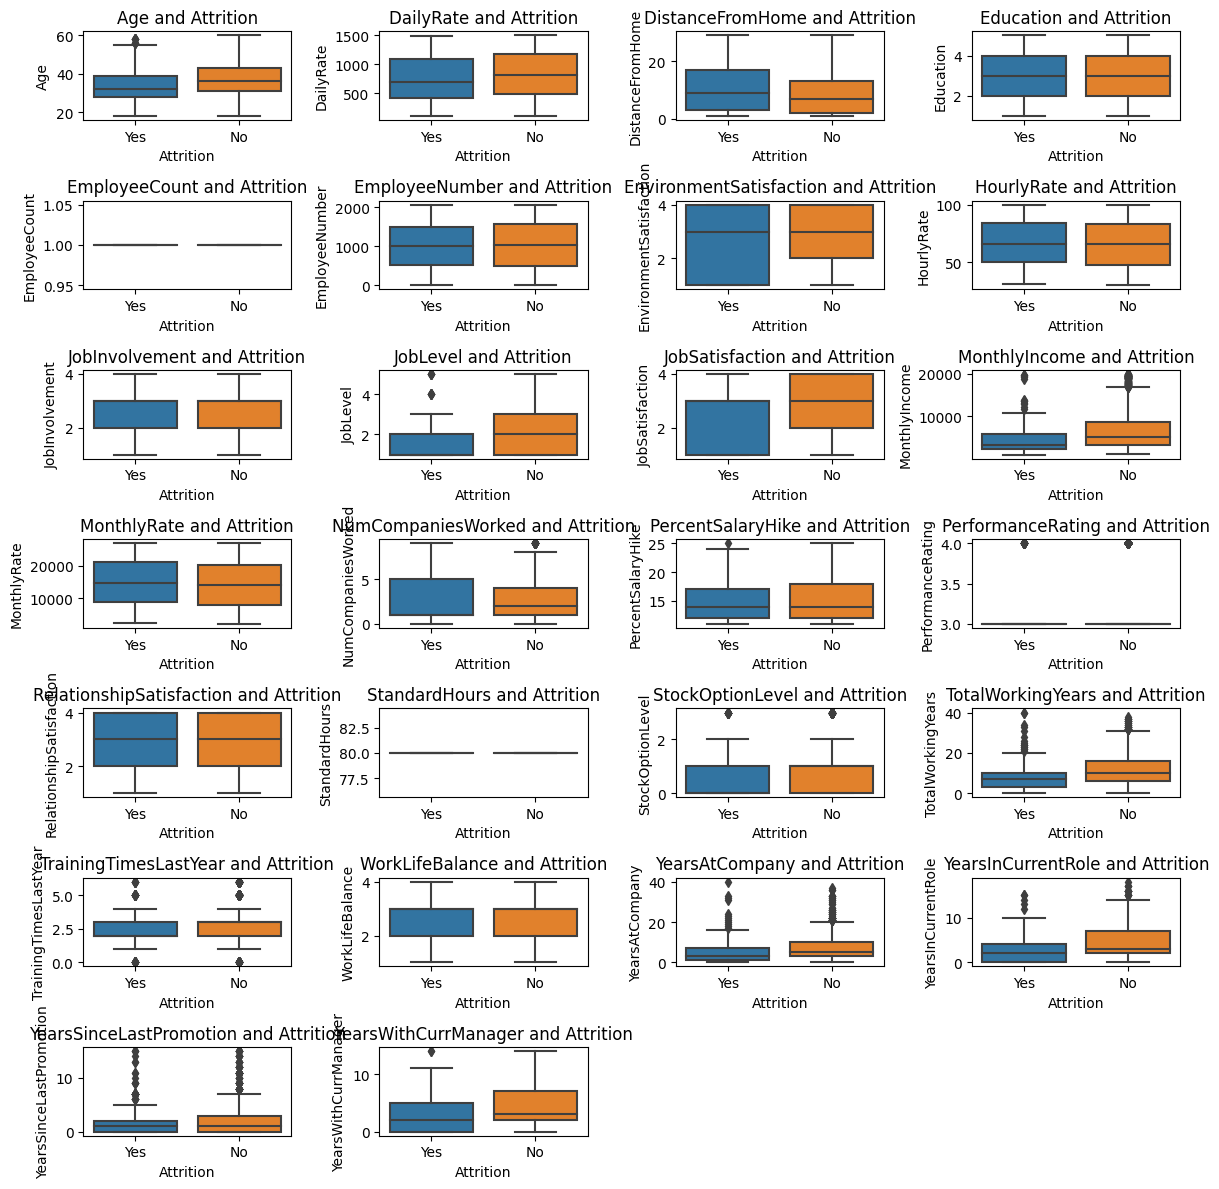

In [96]:
# attrition과의 관계에 따른 Box Plot 그려보자

plt.figure(figsize=(12, 12))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(7, 4, i)
    sns.boxplot(data=cleaned_data, x='Attrition', y=column)
    plt.title(f'{column} and Attrition')
plt.tight_layout()
plt.show()



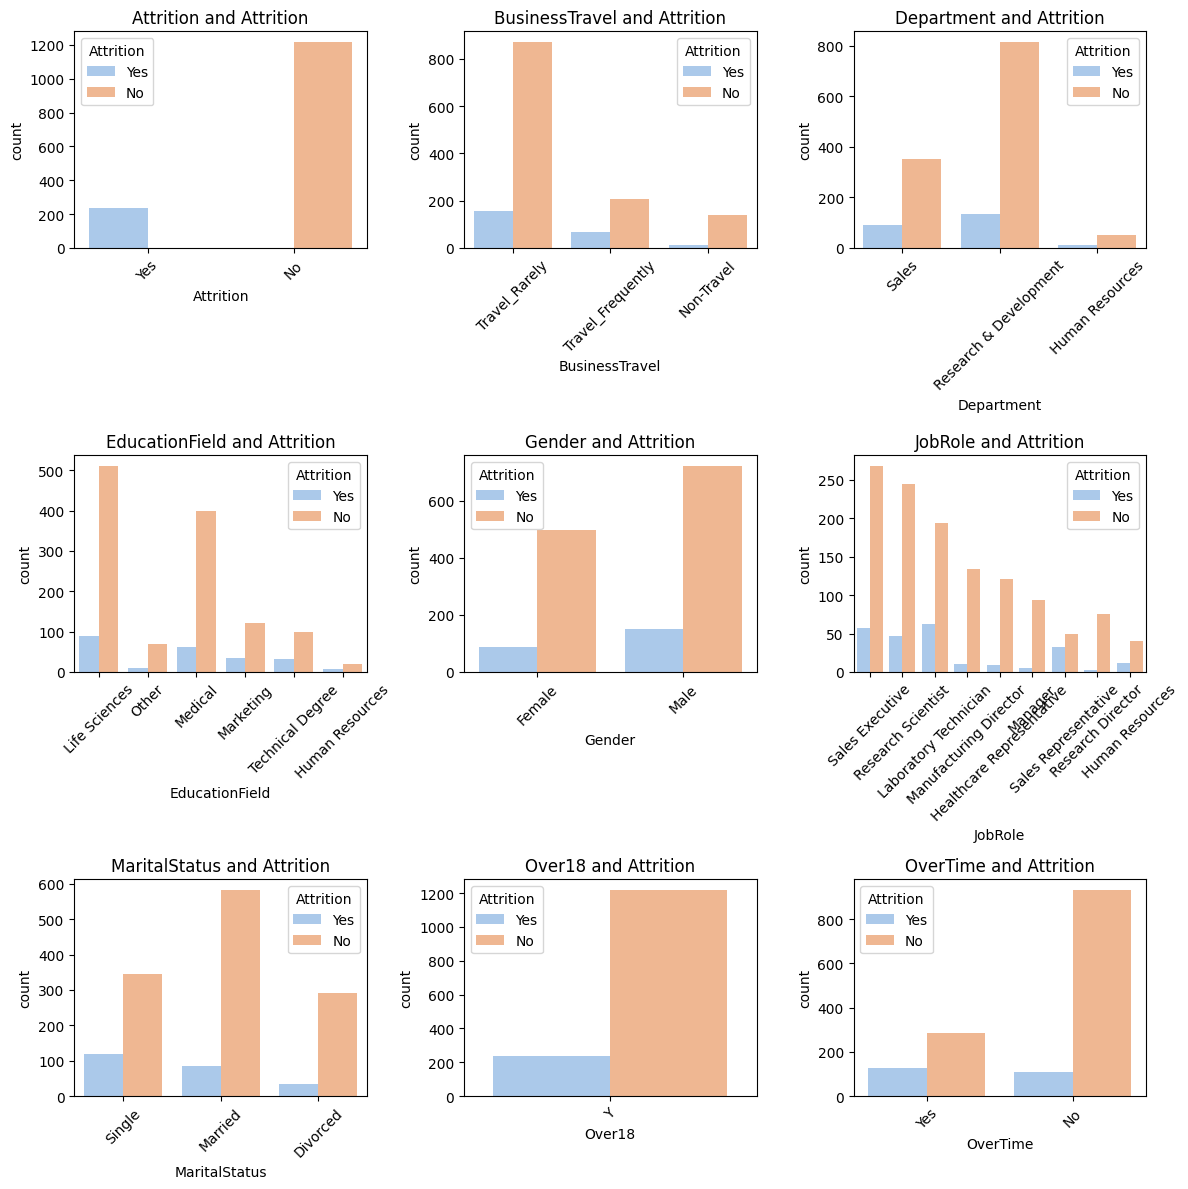

In [97]:
# attrition과 관계지어 Bar Plot 그려보기
plt.figure(figsize=(12, 12))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=cleaned_data, x=column, hue='Attrition', palette='pastel')
    plt.title(f'{column} and Attrition')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

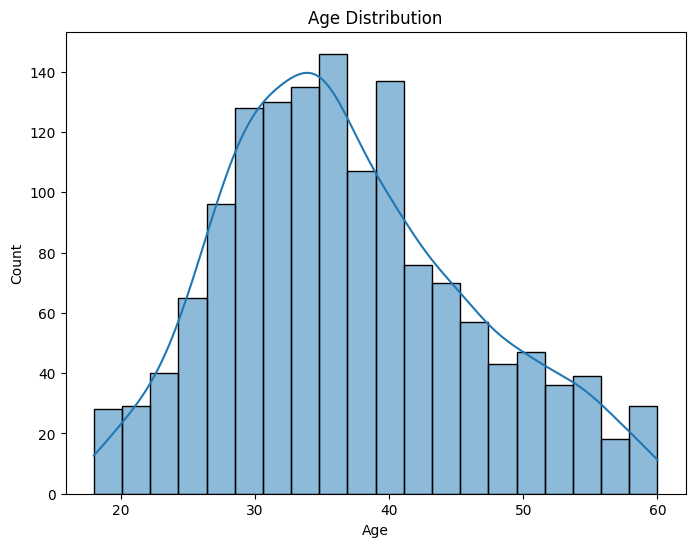

In [98]:
# Histogram: Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=cleaned_data, x='Age', bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

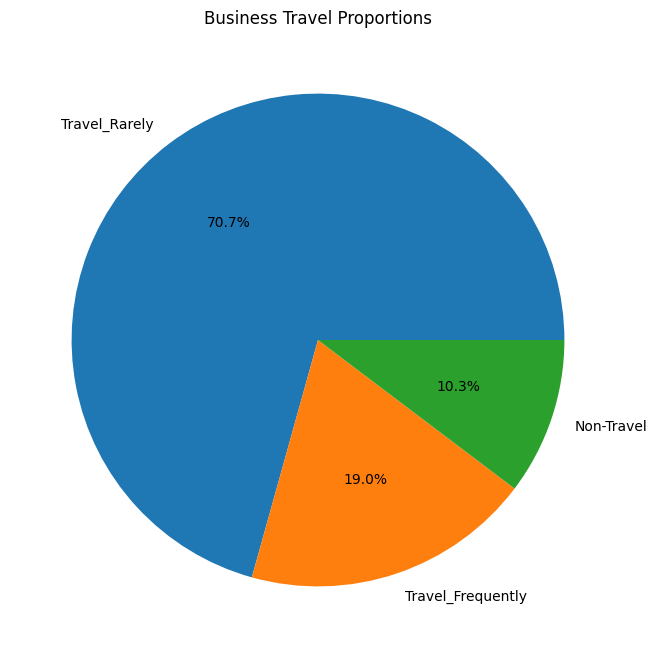

In [99]:
# Pie Chart 그려보기
plt.figure(figsize=(8, 8))
cleaned_data['BusinessTravel'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Business Travel Proportions")
plt.ylabel('')
plt.show()

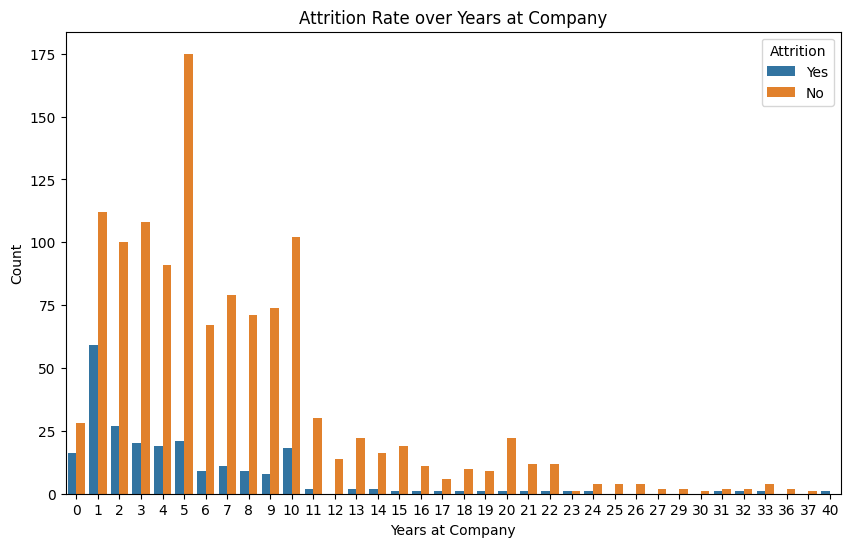

In [102]:
# countPlot 그려보기
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='YearsAtCompany', hue='Attrition')
plt.title("Attrition Rate over Years at Company")
plt.xlabel("Years at Company")
plt.ylabel("Count")
plt.show()

## 3. 수치형 변수 간 상관관계 파악

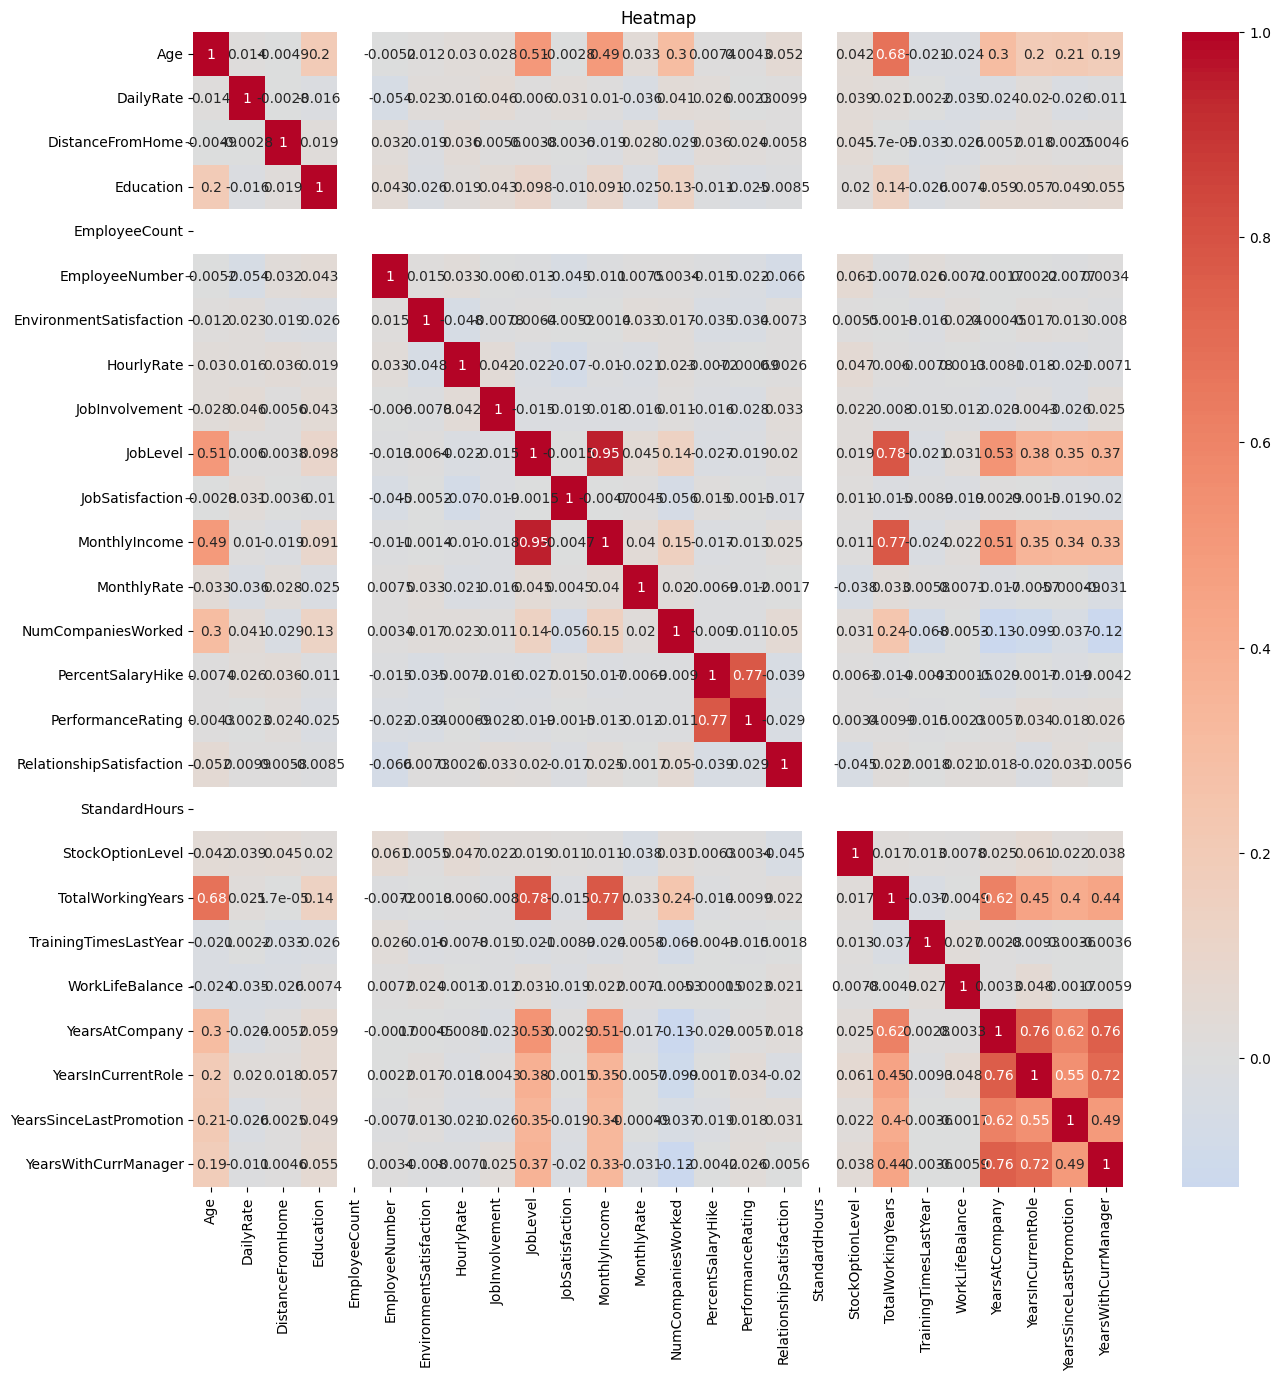

In [103]:
# heatmap을 그려 수치형 변수 간 상관관계를 파악하고자 한다.

cm = cleaned_data[numerical_columns].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, cmap='coolwarm', center=0)
plt.title("Heatmap")
plt.show()

## 4. 파생변수 생성

In [104]:
# 나이로 연령대 파생변수를 생성하고자 한다.

age_groups = [18,30,45,float('inf')]
age_labels = ['청년층','중년층','장년층']

cleaned_data['연령대'] = pd.cut(cleaned_data['Age'], bins=age_groups, labels=age_labels, right=False)

print(cleaned_data['연령대'].head(10))


0    중년층
1    장년층
2    중년층
3    중년층
4    청년층
5    중년층
6    장년층
7    중년층
8    중년층
9    중년층
Name: 연령대, dtype: category
Categories (3, object): ['청년층' < '중년층' < '장년층']


<ipython-input-104-6f5fa820179e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['연령대'] = pd.cut(cleaned_data['Age'], bins=age_groups, labels=age_labels, right=False)
